In [ ]:
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('wordnet')

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def plot_word_cloud(text):
  text = text.Sentence.values
  wordcloud = WordCloud(
      width = 3000,
      height = 2000,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (10, 7),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

def preprocess_data(df):
  sentences = df.Sentence.values
  labels = df.Label.values
  tokenized_sentences = [word_tokenize(word) for word in sentences]
  filtered_sentences = [remove_stopwords(word) for word in tokenized_sentences]
  return filtered_sentences, labels

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
STOPWORD_SET = set(stopwords.words('english'))
SAMPLE_SENTENCE = word_tokenize('I need to remove all these meaningless stopwords.')
SAMPLE_SOLUTION = ['I', 'need', 'remove', 'meaningless', 'stopwords', '.']


print ("Train & Test Files are loaded")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


--2022-10-14 00:50:56--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv’

finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0s      

2022-10-14 00:50:56 (68.7 MB/s) - ‘finance_test.csv’ saved [29264/29264]

--2022-10-14 00:50:56--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis

In [ ]:

df_train = get_finance_train()
print(df_train.head())

                                                                                              Sentence  \
0                                                 Autotank Group is part of Aspo 's Systems Division .   
1  The contract includes design , construction , delivery of equipment , installation and commissio...   
2  Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...   
3  The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...   
4  The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...   

   Label  
0      1  
1      1  
2      2  
3      1  
4      2  


In [ ]:
print('There are a total of {} examples in the Finance Train dataset.'.format(df_train.shape[0]))

There are a total of 2037 examples in the Finance Train dataset.


In [ ]:

df_test = get_finance_test()
print(df_test.head())

                                                                                              Sentence  \
0  In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...   
1  Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...   
2                                               Financing of the project will come mainly from China .   
3  Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...   
4  Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...   

   Label  
0      2  
1      2  
2      1  
3      1  
4      2  


In [ ]:
print('There are a total of {} examples in the Finance Test dataset.'.format(df_test.shape[0]))

There are a total of 227 examples in the Finance Test dataset.


In [ ]:
print(LABEL_MAP)

{0: 'negative', 1: 'neutral', 2: 'positive'}


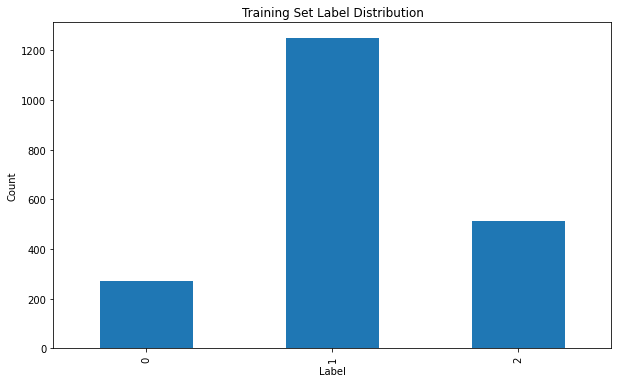

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
df_train.groupby('Label').Sentence.count().plot.bar(ylim=0)
plt.show()

In [ ]:
negative_data = df_train[df_train['Label'] == 0]

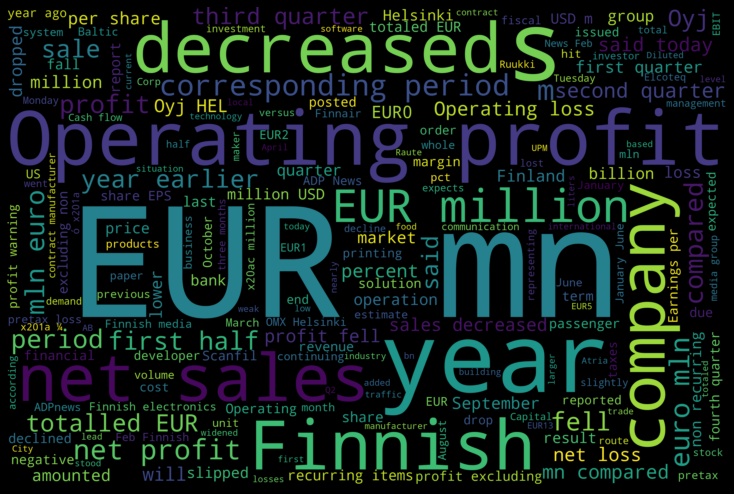

In [ ]:
plot_word_cloud(negative_data)

In [ ]:
positive_data = df_train[df_train['Label'] == 2]

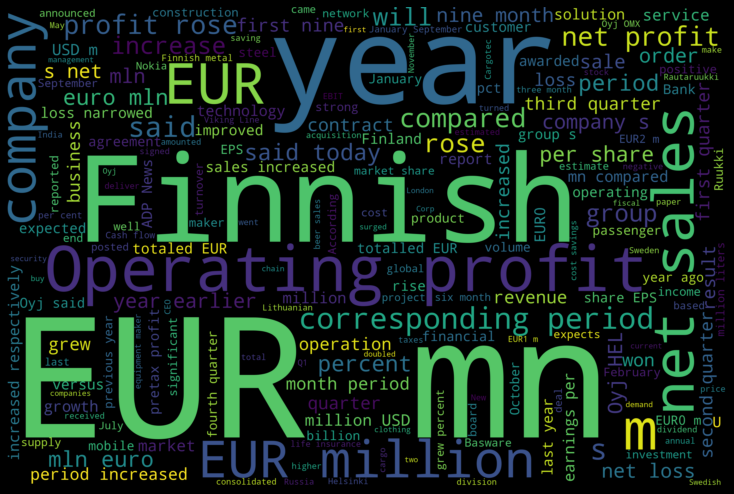

In [ ]:
plot_word_cloud(positive_data)

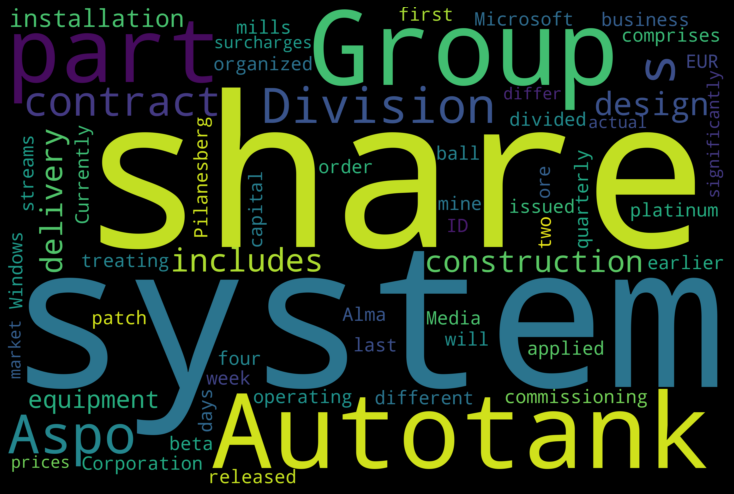

In [ ]:

neutral_data = df_train[df_train['Label'] == 1]
plot_word_cloud(neutral_data)

In [ ]:

print('Sample Input:\t{}'.format(SAMPLE_SENTENCE))
print('Sample Output:\t{}'.format(SAMPLE_SOLUTION))

Sample Input:	['I', 'need', 'to', 'remove', 'all', 'these', 'meaningless', 'stopwords', '.']
Sample Output:	['I', 'need', 'remove', 'meaningless', 'stopwords', '.']


In [ ]:
def remove_stopwords(tokenized_sentence):
  filtered_sentence = []
  for w in tokenized_sentence:
    if w not in STOPWORD_SET: filtered_sentence.append(w)
  return filtered_sentence

In [ ]:
remove_stopwords(SAMPLE_SENTENCE)

['I', 'need', 'remove', 'meaningless', 'stopwords', '.']

In [ ]:

train_sentences, train_labels = preprocess_data(df_train)
for sentence in train_sentences[:3]:
    print(sentence)

['Autotank', 'Group', 'part', 'Aspo', "'s", 'Systems', 'Division', '.']
['The', 'contract', 'includes', 'design', ',', 'construction', ',', 'delivery', 'equipment', ',', 'installation', 'commissioning', '.']
['Rapala', 'said', 'estimates', 'make', 'savings', '1-2', 'mln', 'eur', 'year', 'centralising', 'French', 'operations', 'one', 'site', '.']


In [ ]:

test_sentences, test_labels = preprocess_data(df_test)
for sentence in test_sentences[:3]:
    print(sentence)

['In', 'third', 'quarter', '2010', ',', 'net', 'sales', 'increased', '5.2', '%', 'EUR', '205.5', 'mn', ',', 'operating', 'profit', '34.9', '%', 'EUR', '23.5', 'mn', '.']
['Foundries', 'division', 'reports', 'sales', 'increased', '9.7', '%', 'EUR', '63.1', 'mn', 'EUR', '57.5', 'mn', 'corresponding', 'period', '2006', ',', 'sales', 'Machine', 'Shop', 'division', 'increased', '16.4', '%', 'EUR', '41.2', 'mn', 'EUR', '35.4', 'mn', 'corresponding', 'period', '2006', '.']
['Financing', 'project', 'come', 'mainly', 'China', '.']


In [ ]:
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]


In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(all_sentences)

CountVectorizer()

In [ ]:
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()


In [ ]:
print(bag_of_words_matrix)

[[1 1 1 0 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 0 0 1 1 1]]


In [ ]:
print(bag_of_words_matrix.shape)

(2, 14)


In [ ]:
def train_model(train_sentences, train_labels):
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]
  vectorizer = CountVectorizer()
  vectorizer.fit(train_sentences)
  train_vect = vectorizer.transform(train_sentences)
  #NOTE: Can also use train_vect = vectorizer.fit_transform(train_sentences)
  model = LogisticRegression()
  model.fit(train_vect, train_labels)
  return model, vectorizer

In [ ]:
model, train_vectorizer = train_model(train_sentences, train_labels)

In [ ]:
def predict(test_sentences, test_labels, vectorizer, model):
  
  test_sentences = [" ".join(t) for t in  test_sentences]
  test_vect = vectorizer.transform(test_sentences)
  preds = model.predict(test_vect)
  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [ ]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)
print('The model had an accuracy of {:.2%} on the test dataset'.format(test_accuracy))

The model had an accuracy of 85.46% on the test dataset


Plotting the Confusion Matrix


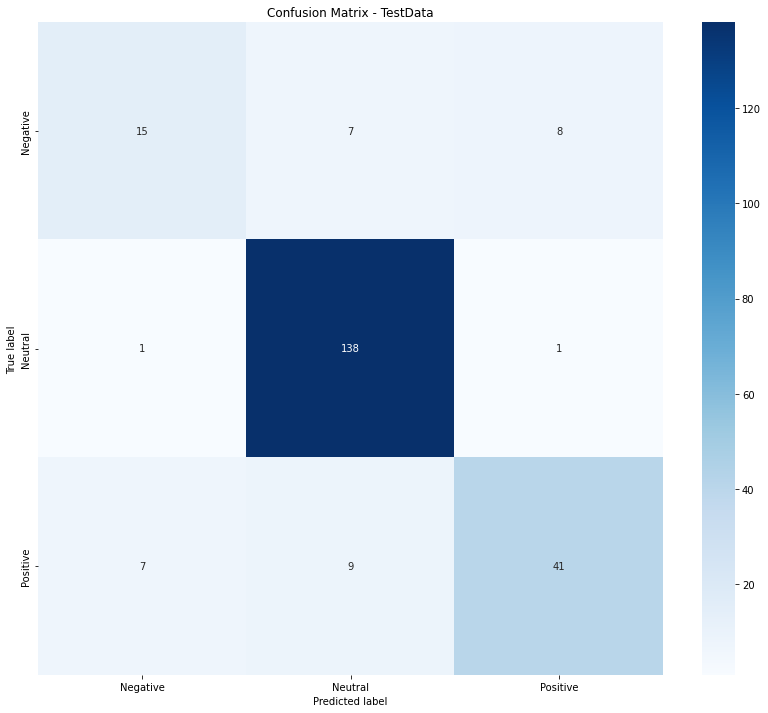

In [ ]:
plot_confusion_matrix(test_labels, y_predictions)

In [ ]:
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300


nltk.download('wordnet')

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

print ("Train & Test Files are loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


finance_test.csv.1  100%[===================>]  28.58K  --.-KB/s    in 0s      
finance_train.csv.1 100%[===================>] 252.53K  --.-KB/s    in 0.002s  
Train & Test Files are loaded


In [ ]:
longest_sentence_index = np.argmax([len(x) for x in df_train['Sentence'].str.split(' ')])
longest_sentence = df_train.iloc[longest_sentence_index]['Sentence']
longest_sentence_length = len(longest_sentence.split(' '))
print('The longest sentence has length {} and is: \n\n{}'.format(longest_sentence_length, longest_sentence))

The longest sentence has length 81 and is: 

Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .


In [ ]:
print(PUNCTUATION)

!#$%&()*,-./:;<=>?@^_`{|}~


In [ ]:
sample_sentence = 'There, is-! a# lo?t of< pu>=nctuat-io!n he~re!'
print(sample_sentence)
PUNCTUATION_RE = re.compile("[%s]" % PUNCTUATION)

filtered_sample_sentence = PUNCTUATION_RE.sub("", sample_sentence)
print(filtered_sample_sentence)

There, is-! a# lo?t of< pu>=nctuat-io!n he~re!
There is a lot of punctuation here


In [ ]:

example_sentence = 'No, th-at:/- is not,. how you w.rite a] pr!op$er sen^*tence'
print(example_sentence)
print(clean_text(example_sentence))

No, th-at:/- is not,. how you w.rite a] pr!op$er sen^*tence
write proper sentence


In [ ]:

train_example = df_train.iloc[100]['Sentence']
print(train_example)
print(clean_text(train_example))

Tyrvaan Sanomat , published twice a week by Tyrvaan Sanomat Oy , appears in Sastamala and Kiikoinen .
tyrvaan sanomat published twice week tyrvaan sanomat oy appears sastamala kiikoinen


In [ ]:

df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)


In [ ]:
MAX_SEQUENCE_LENGTH = 256
MAX_NB_WORDS = 1000

In [ ]:

X_train = pad_sequences_train(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_train.shape))
print(X_train[0])

The shape of the dataframe is (2037, 256)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 

In [ ]:

X_test = pad_sequences_test(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_test.shape))

The shape of the dataframe is (227, 256)


In [ ]:
y_train = pd.get_dummies(df_train['Label']).values
print(y_train.shape)

(2037, 3)


In [ ]:
y_test = pd.get_dummies(df_test['Label']).values
print(y_test.shape)

(227, 3)


In [ ]:
n_labels = 3
label_map = {0 : "negative", 
             1 : "neutral",
             2 : "positive"}

In [ ]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d (SpatialD  (None, 256, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 461,003
Trainable params: 461,003
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

epochs = 5
batch_size = 64

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 63s 2s/step - loss: 0.9228 - accuracy: 0.6590 - val_loss: 0.6742 - val_accuracy: 0.7598
Epoch 2/5
29/29 [==============================] - 50s 2s/step - loss: 0.5606 - accuracy: 0.7665 - val_loss: 0.5627 - val_accuracy: 0.7794
Epoch 3/5
29/29 [==============================] - 52s 2s/step - loss: 0.3810 - accuracy: 0.8527 - val_loss: 0.5217 - val_accuracy: 0.8382
Epoch 4/5
29/29 [==============================] - 50s 2s/step - loss: 0.2555 - accuracy: 0.9116 - val_loss: 0.4886 - val_accuracy: 0.8627
Epoch 5/5
29/29 [==============================] - 52s 2s/step - loss: 0.1749 - accuracy: 0.9465 - val_loss: 0.5050 - val_accuracy: 0.8235


In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test set loss is {:} and accuracy is {:.2%}'.format(0.5338, 0.8414))

8/8 [==============================] - 1s 122ms/step - loss: 0.4693 - accuracy: 0.8678
Test set loss is 0.5338 and accuracy is 84.14%


In [ ]:
training_loss = history.history['loss']

In [ ]:
validation_loss = history.history['val_loss']

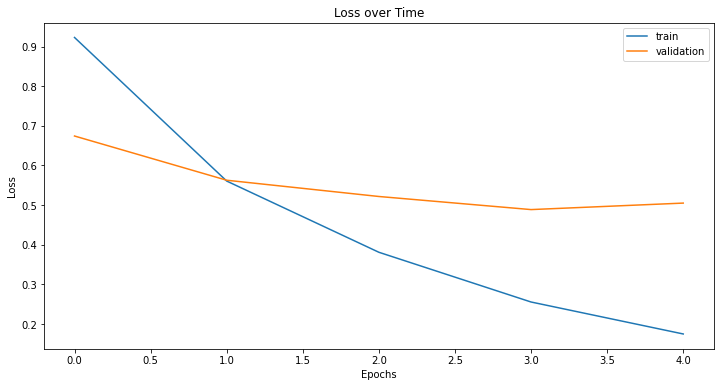

In [ ]:

fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

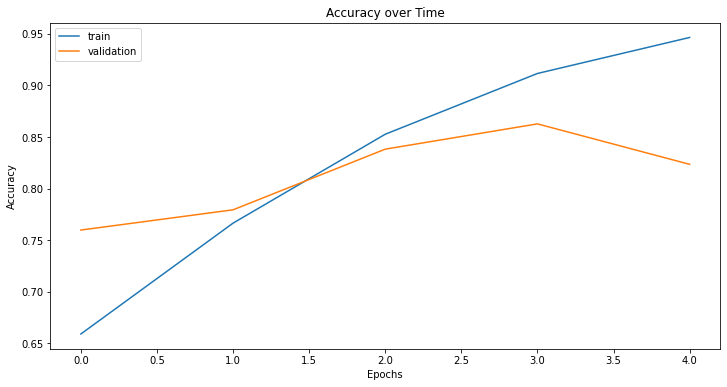

In [ ]:

fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

In [ ]:

model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=6,
    max_sequence_length=256,
    max_nb_words=1500,
    embedding_dim=280
)
print('New test accuracy is {}'.format(test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 280)          420280    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 256, 280)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               152400    
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 572,983
Trainable params: 572,983
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/6
29/29 [==============================] - 52s 2s/step - loss: 0.9286 - accuracy: 0.6830 - val_loss: 

In [ ]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

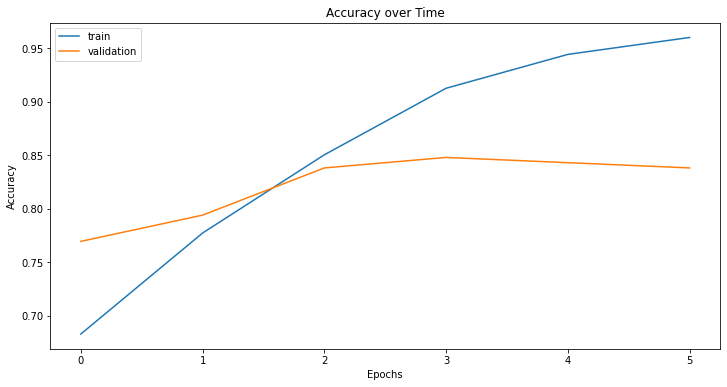

In [ ]:

fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

In [ ]:
!pip install transformers
import os
import gdown
import torch
import numpy as np
import transformers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, AdamW, BertConfig
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

%matplotlib inline

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

print ("Train and Test Files Loaded as train.csv and test.csv")

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
NONE = 4 * [None]
RND_SEED=2020



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-14 00:35:03--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv.2’

finance_test.csv.2  100%[===================>]  28.58K  --.-KB/s    in 0.001s  

2022-10-14 00:35:03 (55.7 MB/s) - ‘finance_test.csv.2’ saved [29264/29264]

--2022-10-14 00:35:03--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv
Resolving storage.googleapis.com (storage

In [ ]:

df_train = get_finance_train()
df_test = get_finance_test()

In [ ]:
sentences = df_train['Sentence'].values
labels = df_train['Label'].values

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
print(tokenizer.vocab_size)

30522


In [ ]:
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Original Sentence: ', original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)

Original Sentence:  Autotank Group is part of Aspo 's Systems Division .
Tokenized Sentence:  ['auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.']


In [ ]:
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)
print('Mapped Indices Sentence: ', tokenizer.convert_tokens_to_ids(tokenized_sentence))

Tokenized Sentence:  ['auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.']
Mapped Indices Sentence:  [8285, 5794, 2243, 2177, 2003, 2112, 1997, 2004, 6873, 1005, 1055, 3001, 2407, 1012]


In [ ]:

sentences_with_special_tokens = []
for sentence in sentences:
  new_sentence = "[CLS] " + sentence + " [SEP]"
  sentences_with_special_tokens.append(new_sentence)
print(sentences_with_special_tokens[0])

[CLS] Autotank Group is part of Aspo 's Systems Division . [SEP]


In [ ]:
tokenized_texts = []
for sentence in sentences_with_special_tokens:
  tokenized_sentence = tokenizer.tokenize(sentence)
  tokenized_texts.append(tokenized_sentence)
print(tokenized_texts[0])

['[CLS]', 'auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.', '[SEP]']


In [ ]:
input_ids = []
for text in tokenized_texts:
  new_list = tokenizer.convert_tokens_to_ids(text)
  input_ids.append(new_list)
print(input_ids[0])

[101, 8285, 5794, 2243, 2177, 2003, 2112, 1997, 2004, 6873, 1005, 1055, 3001, 2407, 1012, 102]


In [ ]:
input_ids = pad_sequences(input_ids, 
                          maxlen=None, ### YOUR CODE HERE
                          dtype="long",
                          truncating="post", 
                          padding="post")

In [ ]:

input_ids = pad_sequences(input_ids, 
                          maxlen=128,
                          dtype="long",
                          truncating="post", 
                          padding="post")
print(input_ids[0])

[ 101 8285 5794 2243 2177 2003 2112 1997 2004 6873 1005 1055 3001 2407
 1012  102    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
attention_masks = []
for sequence in input_ids:
  mask = [float(i > 0) for i in sequence]
  attention_masks.append(mask)
print (attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(input_ids, 
                                                  labels,
                                                  test_size=0.15, 
                                                  random_state=RND_SEED)

In [ ]:
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids, 
                                                       test_size=0.15,
                                                       random_state=RND_SEED)

In [ ]:
train_inputs = torch.tensor(np.array(X_train));
validation_inputs = torch.tensor(np.array(X_val));
train_masks = torch.tensor(np.array(train_masks));
validation_masks = torch.tensor(np.array(validation_masks));
train_labels = torch.tensor(np.array(y_train));
validation_labels = torch.tensor(np.array(y_val));

batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels);
train_sampler = RandomSampler(train_data); # Samples data randonly for training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size);
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels);
validation_sampler = SequentialSampler(validation_data); # Samples data sequentially
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size);

In [ ]:
#Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT small model, with an uncased vocab.
    num_labels = 3,    
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
);

# Given that this a huge neural network, we need to explicity specify 
# in pytorch to run this model on the GPU.
model.cuda();

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, ### YOUR CODE HERE
                  eps = 1e-8
                )
epochs = 4

In [ ]:
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
training_loss = []
validation_loss = []
training_stats = []
for epoch_i in range(0, epochs):
    # Training
    print('Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training the model')
    total_train_loss = 0
    # Put the model into training mode. 
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 20 == 0 and not step == 0:
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}. '.format(step, len(train_dataloader)))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)  
        model.zero_grad()  
        outputs = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        total_train_loss += loss.item()

        loss.backward()
     
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
  
    print("Evaluating on Validation Set")
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:    
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        
            outputs = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    
    
    print("Validation Loss: {0:.2f}".format(avg_val_loss))
    

    training_loss.append(avg_train_loss)
    validation_loss.append(avg_val_loss)
    
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy
            
        }
    )
    
print("Training complete!")

NameError: ignored